## **Student Mark Predictor**

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df = pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


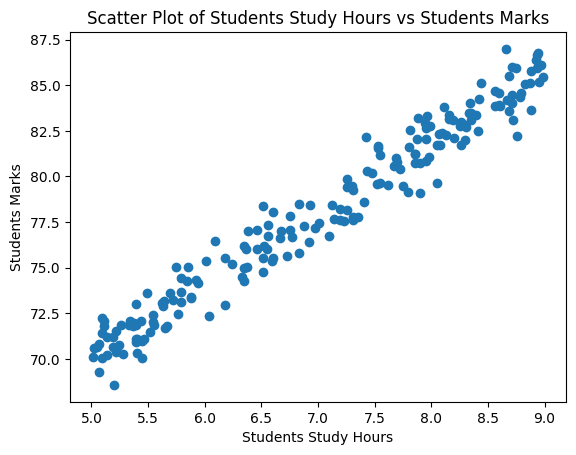

In [7]:
# Plotting the scatter plot 

plt.scatter(x = df.study_hours, y = df.student_marks)
plt.xlabel('Students Study Hours')
plt.ylabel('Students Marks')
plt.title('Scatter Plot of Students Study Hours vs Students Marks')
plt.show()

### **Data Cleaning**

In [8]:
# Checking for null values

df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
df2 = df.fillna(df.mean())
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [11]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### **Preparing the data for Machine Learning Model**

In [14]:
# Splitting the dependent and independent variable

x = df2.drop("student_marks", axis = 1)
y = df2.drop("study_hours", axis = 1)

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (200, 1)
Shape of y:  (200, 1)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 51)

print('Shape of  x_train:', x_train.shape)
print('Shape of  y_train:', y_train.shape)

print('Shape of  x_test:', x_test.shape)
print('Shape of  y_test:', y_test.shape)


Shape of  x_train: (160, 1)
Shape of  y_train: (160, 1)
Shape of  x_test: (40, 1)
Shape of  y_test: (40, 1)


In [16]:
# Selecting the Linear regression for training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([[3.93571802]])

In [19]:
lr.intercept_

array([50.44735504])

In [20]:
m = 3.93
c = 50.44
y = m * 4 + c

In [21]:
y

66.16

In [22]:
lr.predict([[4]])[0][0]

c:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.19022710353573)

In [23]:
y_pred = lr.predict(x_test)
y_pred[:10]

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515]])

In [24]:
y_test[:10]

,student_marks
148,82.02
104,77.55
4,84.19
7,85.46
192,84.03
160,80.81
118,73.61
58,70.90
190,73.14
174,73.02


In [25]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hour", 'student_marks_actual', 'student_marks_pred'])


,study_hour,student_marks_actual,student_marks_pred
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [26]:
# Fine-Tuning the model

lr.score(x_test, y_test)

0.9514124242154464

In [27]:
lr.score(x_train, y_train)

0.9589875741425086

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

Mean Squared Error: 1.1080039417516496
R-squared: 0.9514124242154464
MAE: 0.8780690208883186


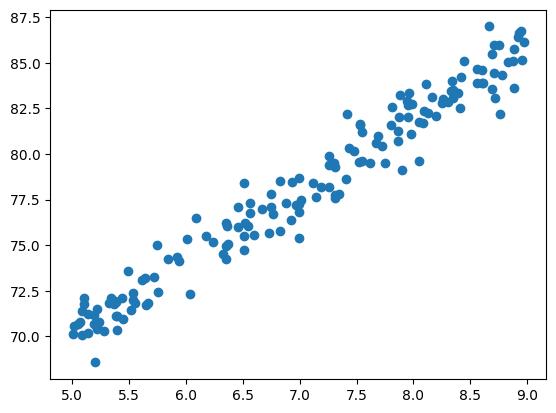

In [28]:
# Plotting the training data

plt.scatter(x_train, y_train)

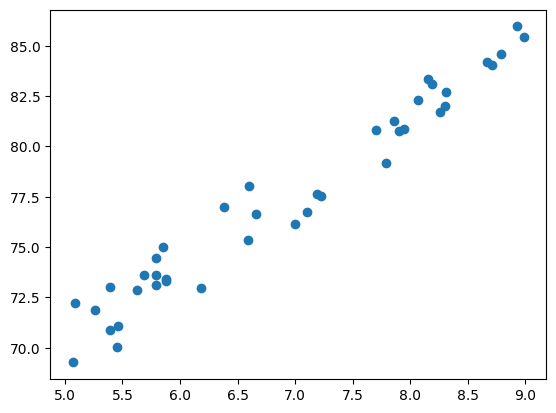

In [29]:
# Plotting the test data

plt.scatter(x_test, y_test)

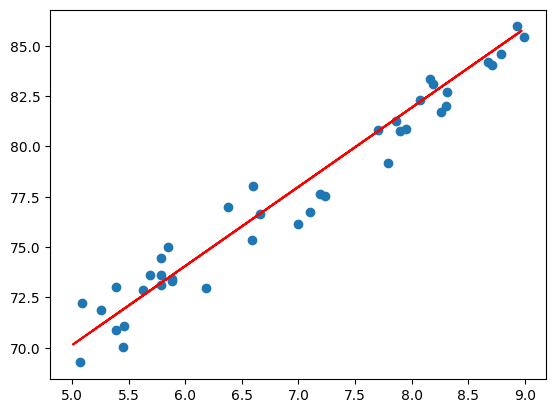

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

In [31]:
# # Saving the model

# import pickle

# # Save the model as a pickle file
# with open('student_marks_predictor_model.pkl', 'wb') as file:
#     pickle.dump(lr, file)

# print("Model saved successfully as 'linear_regression_model.pkl'.")